In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
hfp = pd.read_csv('/content/heart.csv')

## Data investigation

Let's have a look at our data - we see different numerical and categorial data that can lead to cardiovascular disease

In [4]:
hfp.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Firstly I want to investigate some info about patients in this data

Text(0.5, 1.0, 'Age distribution across female patients')

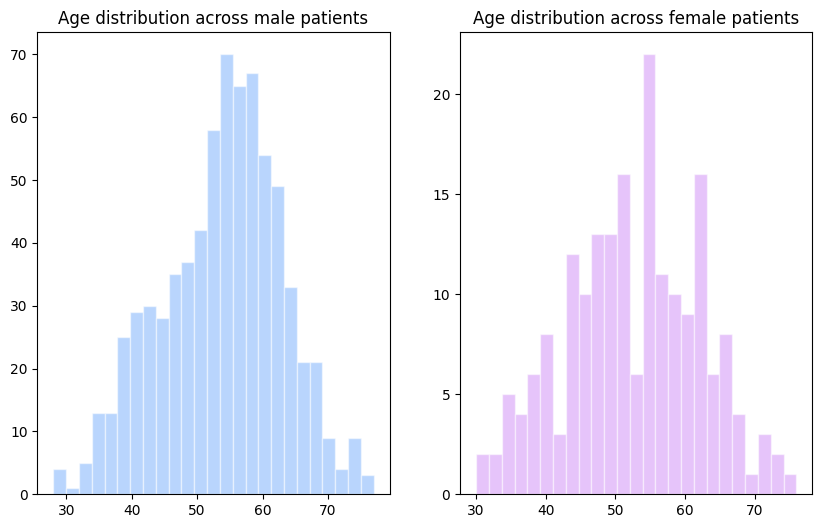

In [31]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(hfp.loc[hfp['Sex'] == 'M', 'Age'], bins=25, alpha=0.5, color='#75ADFD', label='Male', edgecolor='white')
ax[0].set_title('Age distribution across male patients')

ax[1].hist(hfp.loc[hfp['Sex'] == 'F', 'Age'], bins=25, alpha=0.5, color='#CE8AF7', label='Female', edgecolor='white')
ax[1].set_title('Age distribution across female patients')

In [42]:
print(hfp.loc[hfp['Sex'] == 'M', 'Age'].describe())
print()
print(hfp.loc[hfp['Sex'] == 'F', 'Age'].describe())

count    725.000000
mean      53.782069
std        9.397864
min       28.000000
25%       47.000000
50%       55.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

count    193.000000
mean      52.492228
std        9.517593
min       30.000000
25%       46.000000
50%       53.000000
75%       60.000000
max       76.000000
Name: Age, dtype: float64


Clearly we see that this cohort consists mostly of men I would even say that males in this cohort are prevalent (725 vs 193), which is expected, considering that CVD is number 1 death reason for male population. But all of these men and women had heart failure? Let's find out

Text(0.5, 1.0, 'Number of female patients with heart disease')

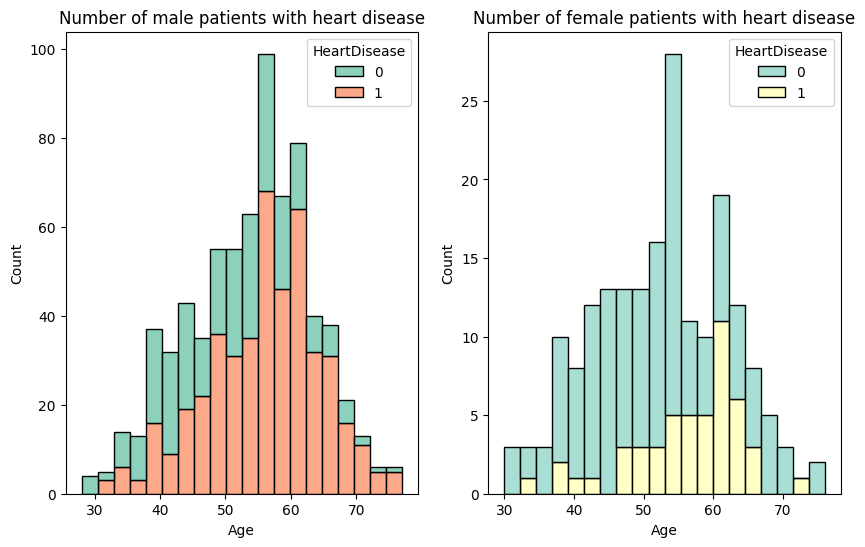

In [74]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))
males = hfp[hfp['Sex'] == 'M']
sns.histplot(males, x='Age', hue='HeartDisease', palette='Set2', bins=20, ax=ax[0], multiple="stack")
ax[0].set_title('Number of male patients with heart disease')

females = hfp[hfp['Sex'] == 'F']
sns.histplot(females, x='Age', hue='HeartDisease', palette='Set3', bins=20, ax=ax[1], multiple="stack")
ax[1].set_title('Number of female patients with heart disease')

Most men in this cohort have a heart disease comparing to women population and the difference is extreme.

Before main analysis let's check our data for some missing values

In [102]:
hfp.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Fortunately, there is none

## Factors analysis

Text(0.5, 1.0, 'Cholesterol level on heart disease')

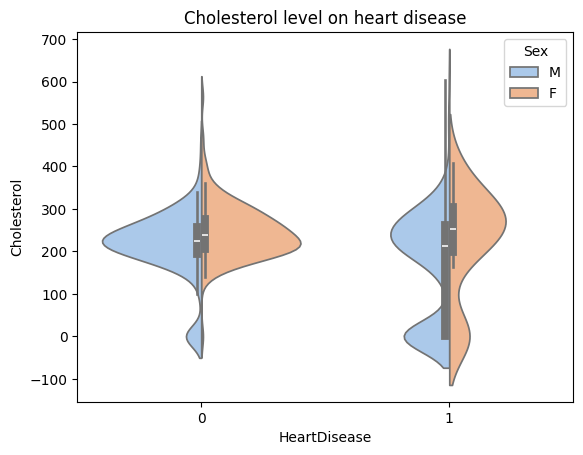

In [91]:
sns.violinplot(data=hfp, x="HeartDisease", y="Cholesterol", hue='Sex', palette='pastel', split=True)
plt.title('Cholesterol level on heart disease')

Cholesterol levels are one of the main risk factors for CVD, and violin plot shows that patients with heart disease have increased levels of cholesterols. Interestingly enough, diseased patients also have small group of 0 mm/dl cholesterol values. I suppose this can be artefact - missing data

In [101]:
pd.crosstab([hfp.Sex,hfp.HeartDisease], hfp.FastingBS, margins=True).style.background_gradient(cmap='crest')

FastingBS corresponds to the fasting blood sugar level, which is a mark of diabetes (FastingBS = 1 - diabetes). Crosstab analysis didn't show strong correlation between diabetes and CVD.

<Axes: xlabel='ChestPainType', ylabel='Age'>

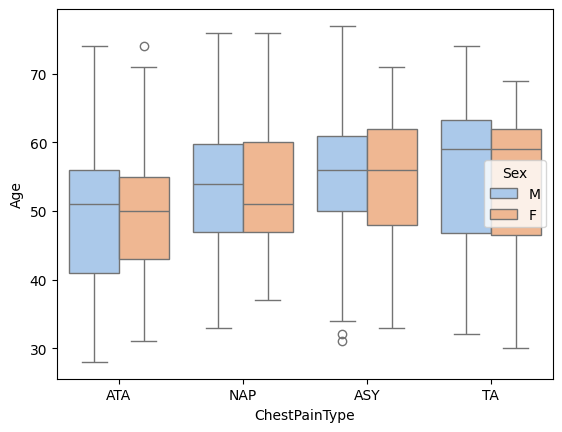

In [130]:
sns.boxplot(data=hfp, x="ChestPainType", y="Age", hue="Sex", palette='pastel')

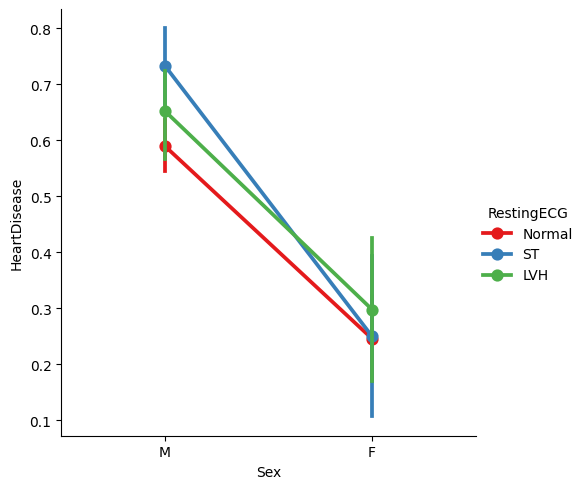

In [121]:
sns.catplot(data=hfp, x="Sex", y="HeartDisease", hue="RestingECG", kind="point", palette='Set1')

ECG data can be a good factor to predict a disease, cause it is easily trackable parameter. There is interesting distribution between male's and female's ECG status: ST-T wave abnormality of cardiogram has more impact on men, whereas women's leading reason is presence of left ventricular hypertrophy.

<Axes: >

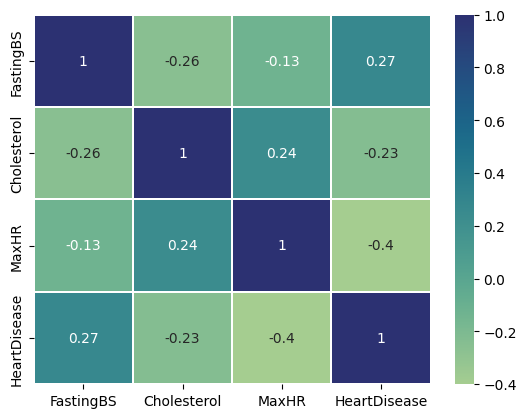

In [139]:
blood_parameters=hfp[['FastingBS', 'Cholesterol', 'MaxHR', 'HeartDisease']]
sns.heatmap(blood_parameters.corr(), annot=True, cmap='crest', linewidths=0.2)

In general, none of the blood parameters have strong association with CVD.

In [144]:
hfp['ChestPainType'].replace(['TA','ATA','NAP', 'ASY'], ['00', '01', '10','11'], inplace=True)
hfp['RestingECG'].replace(['Normal','ST','LVH'], [0,1,2], inplace=True)
hfp['ExerciseAngina'].replace(['N','Y'], [0,1], inplace=True)
hfp['ST_Slope'].replace(['Up','Flat','Down'], [1,0,-1], inplace=True)
hfp

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,01,140,289,0,0,172,0,0.0,1,0
1,49,F,10,160,180,0,0,156,0,1.0,0,1
2,37,M,01,130,283,0,1,98,0,0.0,1,0
3,48,F,11,138,214,0,0,108,1,1.5,0,1
4,54,M,10,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,00,110,264,0,0,132,0,1.2,0,1
914,68,M,11,144,193,1,0,141,0,3.4,0,1
915,57,M,11,130,131,0,0,115,1,1.2,0,1
916,57,F,01,130,236,0,2,174,0,0.0,0,1


<Axes: >

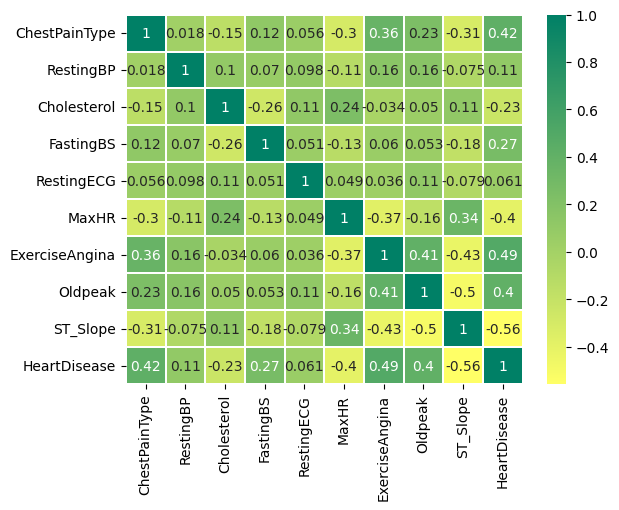

In [145]:
data_corr = hfp.drop(['Age', 'Sex'], axis=1)
sns.heatmap(data_corr.corr(), annot=True, cmap='summer_r', linewidths=0.2)

After some variable encoding we can analyse impact of all factors on heart failure. Strongest correlation is observed for ChestPainType and ExerciseAngina

### In conclusion, all of this factors can be used in prediction models for spotting CVD, but based on analysis above I would suggest to give a special weight for age (disease affected people around 55-60 years old), cholesterol levels, chest pain type and exercise-induced angina.